<a href="https://colab.research.google.com/github/RaniaRekik/tp_Reseaux_Neurones-/blob/main/R%C3%A9seaux_de_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics



In [ ]:
from google.colab import drive
drive.mount('/content/drive') 
#1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
data.sample(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica


In [ ]:
# 2-Afficher les 10 premières lignes du DataFrame.
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# 3-Afficher les dimensions du dataframe
print(data.shape)

(150, 6)


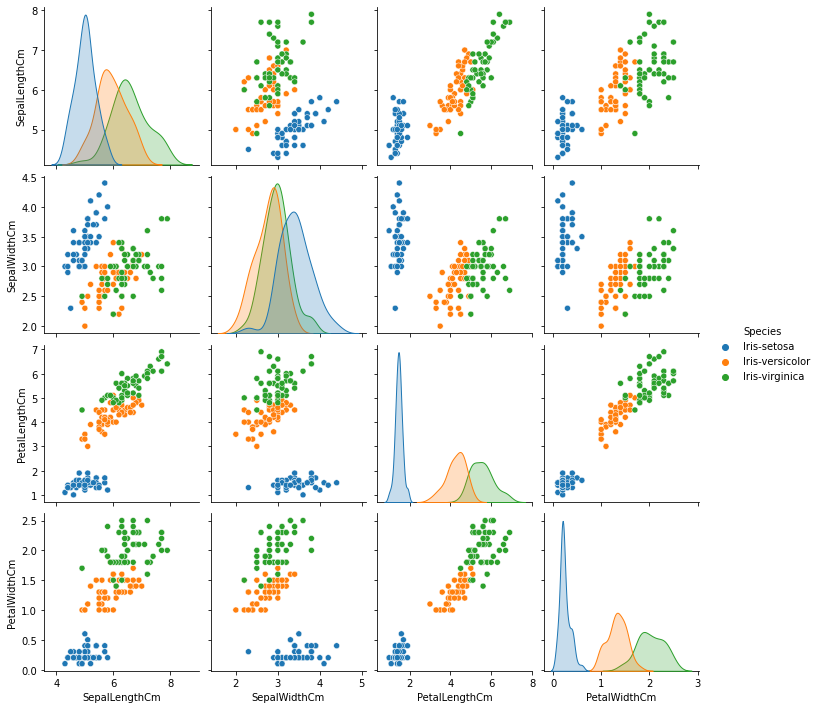

In [ ]:
# 4-Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.
import seaborn as sns 
sns.pairplot(data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species')


In [ ]:
#5-Ecrire un script python permettant de labelliser les différentes espèces d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )

target = data[['Species']].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

target.head(10)



,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# 6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.
norm=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
data_fram= pd.concat([norm, target], axis=1)
data_fram.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
# 7-Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%)
from sklearn import model_selection

train, test = model_selection.train_test_split(data_fram, test_size =0.3)
#the training data features
trainX = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
trainY = train.Species #output for training
#the test data features
testX = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
testY = test.Species #output for test

In [ ]:
#8-Afficher les 10 premières données d’apprentissage et celles de test. trainX.head(10)
trainX.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
71,6.1,2.8,4.0,1.3
61,5.9,3.0,4.2,1.5
138,6.0,3.0,4.8,1.8
56,6.3,3.3,4.7,1.6
74,6.4,2.9,4.3,1.3
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
22,4.6,3.6,1.0,0.2
137,6.4,3.1,5.5,1.8
46,5.1,3.8,1.6,0.2


In [ ]:
trainY.head(10)

71     1
61     1
138    2
56     1
74     1
115    2
117    2
22     0
137    2
46     0
Name: Species, dtype: int64

In [ ]:
testX.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
54,6.5,2.8,4.6,1.5
87,6.3,2.3,4.4,1.3
116,6.5,3.0,5.5,1.8
59,5.2,2.7,3.9,1.4
114,5.8,2.8,5.1,2.4
104,6.5,3.0,5.8,2.2
121,5.6,2.8,4.9,2.0
75,6.6,3.0,4.4,1.4
97,6.2,2.9,4.3,1.3
23,5.1,3.3,1.7,0.5


In [ ]:
testY.head(10)

54     1
87     1
116    2
59     1
114    2
104    2
121    2
75     1
97     1
23     0
Name: Species, dtype: int64

In [ ]:
# 9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données
# avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150) .
from sklearn.neural_network import MLPClassifier  #neural network

from sklearn import metrics


clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(3,3), epsilon=0.07, max_iter=150)
clf.fit(trainX, trainY)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='sgd')

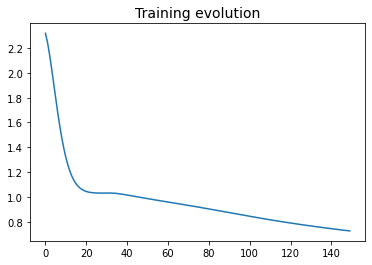

In [ ]:
import matplotlib.pyplot as plt
plt.plot(clf.loss_curve_)
plt.title("Training evolution", fontsize=14)
plt.show()

In [ ]:
prediction = clf.predict(testX)
print(prediction)

[2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 0 0 2 2 2 0 0 0 2 0 2 2 2 0 0 2 2 2
 0 2 2 2 0 0 0 2]


In [ ]:
print(testY.values)

[1 1 2 1 2 2 2 1 1 0 0 1 2 1 0 0 1 1 1 0 0 1 2 1 0 0 0 2 0 2 2 1 0 0 2 2 1
 0 2 1 1 0 0 0 1]


In [ ]:
#10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.

print('The accuracy of the multi-layer perception is:', metrics.accuracy_score(prediction, testY))

The accuracy of the multi-layer perception is: 0.6222222222222222


In [ ]:
pip install pretty_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


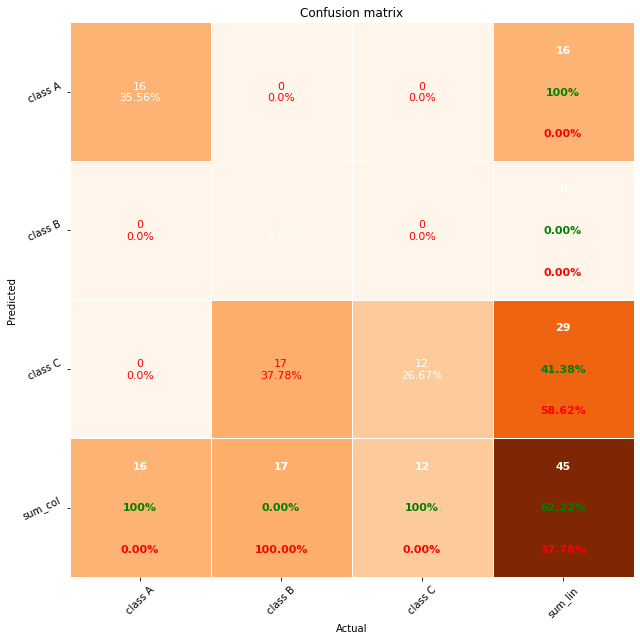

In [ ]:
#11-Afficher la matrice de confusion associée à notre cas.

import numpy as np
from pretty_confusion_matrix import pp_matrix_from_data

cmap = 'PuRd'
pp_matrix_from_data(testY.values, prediction)


In [ ]:
# 13-On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
%time

clf_2 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(3,3), learning_rate_init=0.7,random_state=1, max_iter=150)
clf_2.fit(trainX, trainY)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), learning_rate_init=0.7,
              max_iter=150, random_state=1, solver='sgd')

In [ ]:
#14-Nous allons étudier la variation du paramètre 
#de taux d’apprentissage, donc nous allons afficher 
#la courbe d'évolution d’apprentissage et celle de test
# en fonction de variation du taux d’apprentissage.

params = [
{ "solver" : "sgd",
"learning_rate" : "constant" , 
"learning_rate_init" : 0.2,
"max_iter" : 150,
}, 
{"solver" : "sgd",
"learning_rate" : "constant" , 
"learning_rate_init" : 0.7,
"max_iter" : 300,
}, 
{"solver" : "sgd",
"learning_rate" : "invscaling" , 
"learning_rate_init" : 0.2,
"max_iter" : 300,
}, 
{"solver" : "sgd",
"learning_rate" : "invscaling" , 
"learning_rate_init" : 0.7,
"max_iter" : 150,
}, 
{ "solver" : "adam", "learning_rate_init" : 0.01, 
"max_iter" : 300, 
}, ]
labels= [ "constant learning-rate_0.2",
 "constant learning-rate_0.7",
 "constant learning-rate_0.2",
 "invscaling learning-rate_0.7",
"adam" , 
]
plot_args = [
{ "c" : "red" , "linestyle" : "-"},
{ "c" : "green" , "linestyle" : "-"},
{ "c" : "red" , "linestyle" : "--"},
{ "c" : "green" , "linestyle" : "--"},
]


     

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
mlps = []
for label, param in zip(labels, params) :
  print("training : %s" % label)
  mlp = MLPClassifier(random_state=0, **param)
  mlp.fit(trainX, trainY)
  mlps.append(mlp)
  print("training set score : %f" %mlp.score(trainX,trainY))

training : constant learning-rate_0.2
training set score : 0.333333
training : constant learning-rate_0.7
training set score : 0.352381
training : constant learning-rate_0.2
training set score : 0.990476
training : invscaling learning-rate_0.7
training set score : 0.990476
training : adam
training set score : 0.980952


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


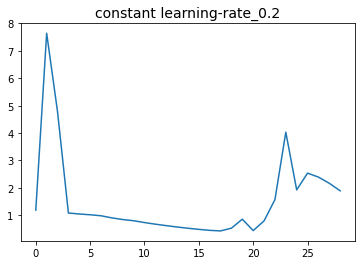

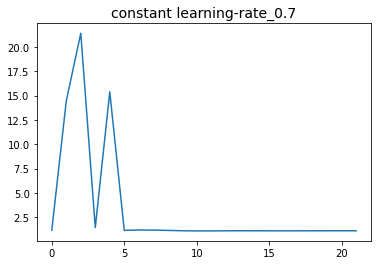

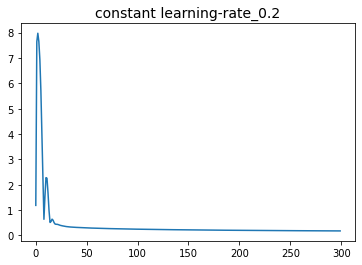

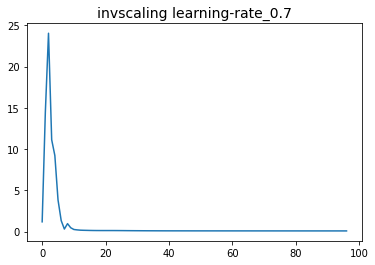

In [ ]:
for mlp, label, args in zip(mlps, labels, plot_args):
  plt.plot(mlp.loss_curve_)
  plt.title(label, fontsize=14)
  plt.show()

In [ ]:
##15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début. Quel est le phénomène constaté ? et comment pouvons- nous surmonter celui-ci ?
clf_3 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(3,3), epsilon=0.07,learning_rate_init=0.7, learning_rate="constant", max_iter=1500)
clf_3.fit(trainX, trainY)

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              learning_rate_init=0.7, max_iter=1500, solver='sgd')

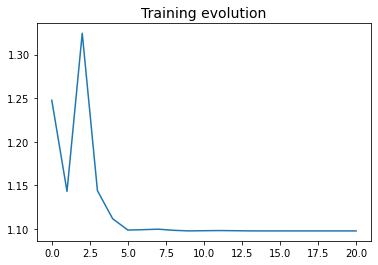

In [ ]:
clf_3.fit(trainX, trainY)
plt.plot(clf_3.loss_curve_)
plt.title("Training evolution", fontsize=14)
plt.show()


In [ ]:
#16-Tester d’autres classifieurs de type réseau de neurones (Récurrent)
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization,Dropout
from keras.wrappers.scikit_learn import  KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD,Adam

In [ ]:
X = data.iloc[:,1:5].values
y = data.iloc[:,5].values
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
trainX,testX, trainY,testY = train_test_split(X,Y,test_size=0.2,random_state=0) 


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))


model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
iris_model = model.fit(trainX,trainY, epochs=500, batch_size=7)


loss, accuracy = model.evaluate(testX, testY, verbose=1)
print('accuracy:', accuracy)
print('loss:', loss)




Epoch 1/500
18/18 [==============================] - 1s 2ms/step - loss: 0.6452 - accuracy: 0.6167
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7000
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.6250
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7000
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.7250
Epoch 6/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7417
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7667
Epoch 8/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.6667
Epoch 9/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.6667
Epoch 10/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.6750
Epoch 11/